In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
from scipy.interpolate import interp1d
from scipy.stats import chisquare
import scipy.constants as sc_const
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from scipy.stats import linregress

### Первая ВАХ ###

$$ U_{\text{накала}} = 6.3 V  $$
$$ T_{\text{сетки}} = 955 \pm 20 C $$

In [2]:
# Первая ВАХ при U накала = 6.3 В
U_n1 = 6.3 #Напряжение накала 1
T_1      = 955 # =- 10
U_1      = np.array([6,  10, 15, 25, 35, 45, 55, 65, 75, 85, 95, 105, 115])
I_1      = np.array([25, 35, 37, 38, 37, 33, 33, 34, 36, 38, 36, 38,  40]) * 10**(-3)
# Ток на амперементре
I_1_amp  = np.array([0.04, 0.09, 0.17, 0.47, 1.47, 3.58, 5.56, 7.54, 9.57, 11.64, 12.64, 14.35, 12.37]) * 10**(-3)

U_1_1      = np.array([0, 2, 5,  7,  10, 15, 20, 25, 31, 35, 40, 45, 50, 60, 66, 70, 75, 81, 85, 90, 95])
I_1_1      = np.array([0, 5, 10, 13, 16, 21, 24, 28, 32, 35, 46, 49, 51, 54, 56, 57, 64, 73, 74, 79]) * 10**(-3)
# Ток на амперементре
I_1_1_amp  = np.array([-0.03, 0.25, 1.08, 2.15, 3.7, 7.05, 10.46, 13.38, 17.00, 19.36, 22.53, 25.7, 30, 33.48,
                       34.50, 35.50, 42.7, 44.8, 47.2, 51.80, 59]) * 10**(-3)

print(T_1)

955


21 21


/tmp/ipykernel_19151/1209246782.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(fontsize=18, markerscale = 2)


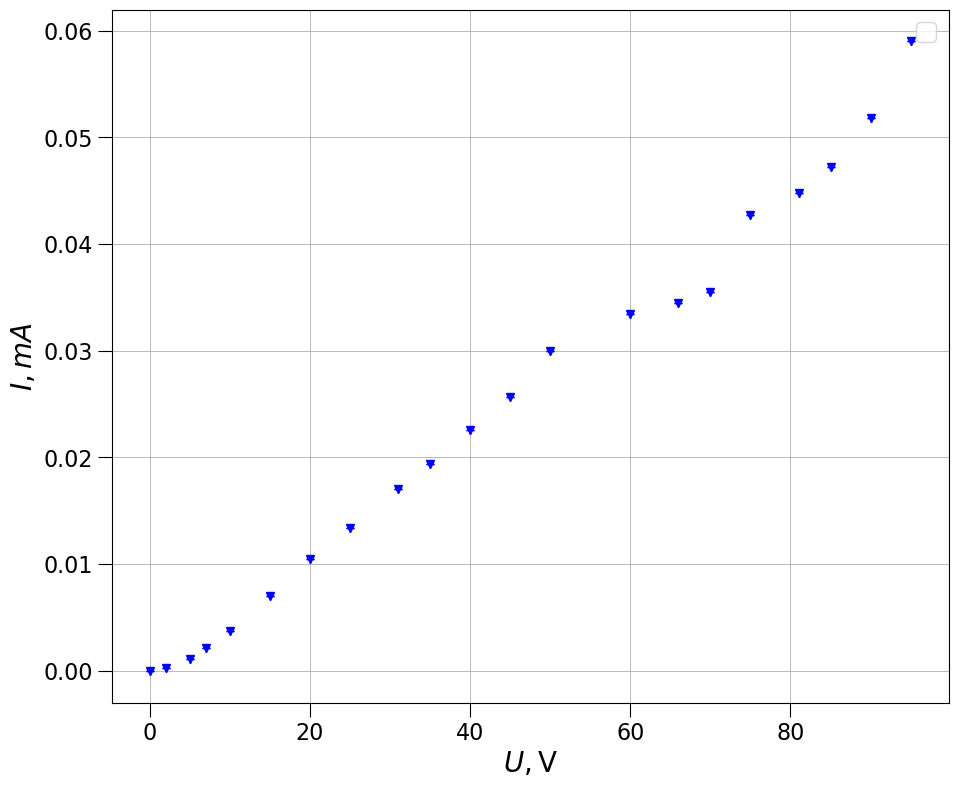

In [3]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
plt.xlabel('$U, \\text{V}$', fontsize=20, rotation=0)

plt.ylabel('$I, mA $', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

print(len(U_1_1), len(I_1_1_amp))

plt.errorbar(
    U_1_1, I_1_1_amp,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0,
    xerr=0,
    color='blue',
    capsize=3
)


plt.legend(fontsize=18, markerscale = 2)

plot_1.savefig('pics/failed_triod.png')


## Новая лампа ##
<!-- # 1# -->

$$ U_{\text{накала}} = 3.1 V  $$
$$ I_{\text{накала}} = 0.23 Am  $$
$$ T_{\text{сетки}} = 873, 916, 955 \pm 20 K $$



$$ U_{\text{накала}} = 3.3 V  $$
$$ I_{\text{накала}} = 0.24 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.7 V  $$
$$ I_{\text{накала}} = 0.21 Am  $$
$$ T_{\text{сетки}} = 839, 823, 850  \pm 20 K $$

$$ U_{\text{накала}} = 3.5 V  $$
$$ I_{\text{накала}} = 0.25 Am  $$
$$ T_{\text{сетки}} = 945, 896, 952  \pm 20 K $$

$$ U_{\text{накала}} = 2.1 V  $$
$$ I_{\text{накала}} = 0.17 Am  $$
$$ T_{\text{сетки}} = 839, 823, 850  \pm 20 K $$

$$ U_{\text{накала}} = 2.4 V  $$
$$ I_{\text{накала}} = 0.24 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

In [4]:
# 3.1
U_1_1      = np.array([0,     2,    4,    6,    8,    11,  12,   14,   16,   18,   20,  22,   24,   26,   27,   30,  40,  50, 60,   70,  80,  90,   100])
I_1_1      = np.array([0.005, 0.06, 0.13, 0.24, 0.39, 0.5, 0.63, 0.76, 0.91, 1.08, 1.2, 1.47, 1.66, 1.87, 1.97, 2.3, 3.5, 4.9, 6.4, 7.9, 9.5, 11.5, 13.3]) * 10**(-3)

#3.3
U_1_2      = np.array([0,     2,     4,    6,    8,    10,   12,   14,  16,   18,   20,   22,   24,   26,   30,  40,  50,  60,  70,  80,  90,  100])
I_1_2      = np.array([0.005, 0.076, 0.16, 0.24, 0.39, 0.52, 0.63, 0.8, 0.95, 1.13, 1.29, 1.46, 1.68, 1.91, 2.3, 3.6, 4.9, 6.3, 8.0, 9.7, 11.5, 13.4]) * 10**(-3)

# 2.7
U_1_3      = np.array([2,    4,    6,    8,    10,   12,   14,   16,   18,   20,   22,   24,   26,   28,    30,    40,  50,  60,  70,   80,   90,    100,  110,   120.2, 130.2, 140,  150.3, 160, 170.1, 180.4, 190,  199.8, 210,  220,  230,  240.3, 250  ])
I_1_3      = np.array([0.05, 0.12, 0.22, 0.32, 0.44, 0.58, 0.73, 0.86, 1.03, 1.23, 1.43, 1.63, 1.84, 2.04,  2.28 , 3.5, 4.8, 6.3, 7.88, 9.48, 11.25, 13.2, 15.05, 17.2, 19.2,   21.4, 23.7,  26.0, 28.3, 30.7,  33.2, 35.2,  37.8, 40.4, 42.5, 45.5,  47.8, ]) * 10**(-3)

# 3.5
U_1_4      = np.array([2.1,   4.0,  6.1,  8.04, 10.26, 12.0, 16.05, 18.0, 20.1,  22.2, 24.1, 26.1, 28.0, 30.2, 40.5, 50.7, 60.3, 70.1, 80.6, 90.5,  101.3])
I_1_4      = np.array([0.06, 0.14, 0.24, 0.36, 0.50,  0.62, 0.93,  1.10, 1.30,  1.51, 1.71, 1.92, 2.13, 2.38, 3.63, 5.04, 6.46, 8.03, 9.82, 11.62,  13.69]) * 10**(-3)

# 2.1
U_1_5      = np.array([2.1,  4.3,  6.3,  8.1,  10.1,  12.5, 14.7, 16.3, 18.3, 20.2, 23.0, 24,   26.1, 28.1, 30.1, 41.3, 52,  60.3, 70.3, 80.6, 91.4,  100.5, 110.2, 120.4, 130, 140,   150, 160, 170])
I_1_5      = np.array([0.02, 0.09, 0.18, 0.27, 0.40, 0.54, 0.69, 0.81, 0.97, 1.14, 1.41, 1.51, 1.72, 1.93, 2.14, 3.43, 4.58, 5.94, 7.36, 8.82, 10.32, 11.52, 12.7,  13.7,  14.7, 15.7, 16.3, 16.6, 16.4]) * 10**(-3)



$$ U_{\text{накала}} = 2.117 V  $$
$$ I_{\text{накала}} = 0.1675 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.404 V  $$
$$ I_{\text{накала}} = 0.1833 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.262 V  $$
$$ I_{\text{накала}} = 0.1750 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.158 V  $$
$$ I_{\text{накала}} = 0.1696 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.215 V  $$
$$ I_{\text{накала}} = 0.1729 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 2.051 V  $$
$$ I_{\text{накала}} = 0.1635 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$ U_{\text{накала}} = 1.998 V  $$
$$ I_{\text{накала}} = 0.1605 Am  $$
$$ T_{\text{сетки}} = 907, 934, 953 \pm 20 K $$

$$U_{offset} = 0.013 V $$
$$I_{offset} = -0.2 mA$$

In [5]:
def mnk(x, y):
    k = ((x*y).mean() - x.mean() * y.mean())/((x**2).mean() - (x.mean())**2)
    sigma_k = np.sqrt(1/len(y)) * np.sqrt(((y**2).mean() - (y.mean())**2)/((x**2).mean() - (x.mean())**2) - k**2)

    b = y.mean() - k*x.mean()
    sigma_b = sigma_k * np.sqrt((x**2).mean() - (x.mean())**2)
    ret = [k, sigma_k, b, sigma_b]
    return ret

In [6]:
# New lamp

# 2.1
U_2_1      = np.array([5.0, 10.1, 20.2, 30.5, 40.5, 50.3, 60.3, 70.4, 80.7, 90.6, 100.5, 110.1, 120.3, 130.3])
I_2_1      = np.array([0,   0.2,  0.9,  1.7,  2.7, 3.7, 4.8,   5.8,  6.7,  7.4,  7.9,    8.1,  8.3,  8.4]) * 10**(-3)

# 2.4 - не дошли до насыщения
# U_2_2      = np.array([50.6, 60.4, 70.3, 80.6, 90.3, 100.4, 110.1, 120.3, 130.1, 140.6, 150,  160.1, 170,  180.3])
# I_2_2      = np.array([4.0,  5.1,  6.4,  7.9,  9.3,  10.8,  12.2,  13.6,  14.8,  16.1,  17.1, 18.2,  19.2, 20.6, ]) * 10**(-3)

# 2.25
U_2_3      = np.array([10.6, 20.3, 30.7, 40.2, 51.7, 61.4, 71,  80.2, 90.3, 100, 111.3, 120.3, 130.1, 140.1, 150, 160, 170])
I_2_3      = np.array([0.3,  0.9,  1.8,  2.7,  4.0,  5.1,  6.2, 7.5,  8.7,  9.8, 10.9, 11.6,   12.2,  12.7,  13.0, 13.3, 13.6]) * 10**(-3)

# 2.16
U_2_4      = np.array([10.5, 20.8, 30.8, 40.4, 50.1, 60.6, 70.3, 80.1, 90.1, 100.2, 110.7, 121.1, 130, 140])
I_2_4      = np.array([0.3,  0.9,  1.7,  2.7,  3.7,  4.8,  5.8,  6.7,  7.5,  8.1,   8.5,   8.8,   8.8, 9.0]) * 10**(-3)

# 2.21
U_2_5      = np.array([10.7, 20.7, 30.1, 40.2, 50.1, 60.2, 70.3, 80.3, 90.2, 99.9, 110.5, 120.0, 130.1, 140.3, 150.3])
I_2_5      = np.array([0.3,  0.9,  1.7,  2.7,  3.7,  4.9,  6.0,  7.1,  8.0,  8.8,  9.5,   9.9,   10.2,  10.4,  10.6]) * 10**(-3)

# 2.05
U_2_6      = np.array([5,    10,   19.8, 30.1, 40.1, 50.5, 59.8, 70.4, 79.9, 90.5, 101,  110.8, 120,  130.5, 139.9, 150])
I_2_6      = np.array([0.08, 0.29, 0.87, 1.7,  2.59, 3.52, 4.28, 4.95, 5.37, 5.68, 5.87, 6,     6.08, 6.13,  6.17,  6.21]) * 10**(-3)

# 2.00
U_2_7      = np.array([10.8, 21.0, 30.8, 40.5, 50.8, 60.4, 70.4, 80.3, 91.2, 100.4, 112.3, 120.3, 130.1, 140.6, 150])
I_2_7      = np.array([0.32, 0.95, 1.72, 2.51, 3.29, 3.84, 4.22, 4.45, 4.62, 4.72,  4.83,  4.88,  4.92,  4.97,  4.98]) * 10**(-3)

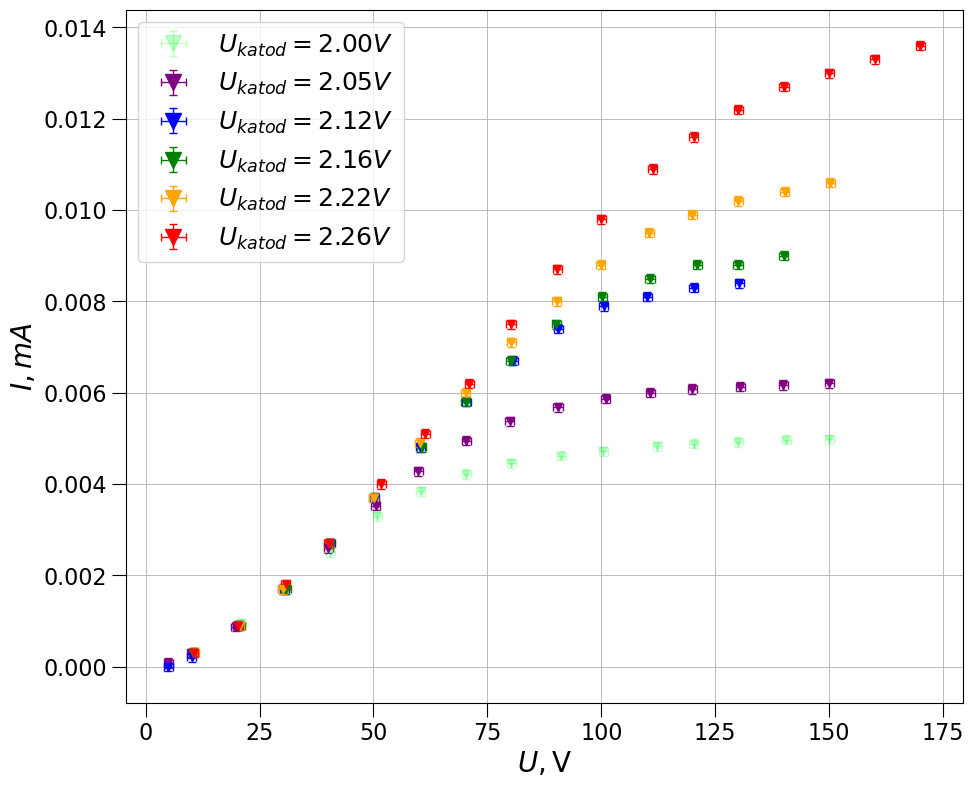

In [7]:
plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
plt.xlabel('$U, \\text{V}$', fontsize=20, rotation=0)

# plt.xlim(0, 30)
# plt.ylim(0, 0.003)
plt.ylabel('$I, mA $', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.errorbar(
    U_2_7, I_2_7,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='#1F34',
    label="$U_{katod} = 2.00 V$",
    capsize=3
)

plt.errorbar(
    U_2_6, I_2_6,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='purple',
    label="$U_{katod} = 2.05 V$",
    capsize=3
)

plt.errorbar(
    U_2_1, I_2_1,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='blue',
    label="$U_{katod} = 2.12 V$",
    capsize=3
)

plt.errorbar(
    U_2_4, I_2_4,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='green',
    label="$U_{katod} = 2.16 V$",
    capsize=3
)

plt.errorbar(
    U_2_5, I_2_5,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='orange',
    label="$U_{katod} = 2.22 V$",
    capsize=3
)

plt.errorbar(
    U_2_3, I_2_3,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0.0001,
    xerr=1,
    color='red',
    label="$U_{katod} = 2.26 V$",
    capsize=3
)

# plt.plot(U_1_1, I_1_1)
# plt.plot(U_1_2, I_1_2)
# plt.plot(U_1_3, I_1_3)
# plt.plot(U_1_5, I_1_5)


plt.legend(fontsize=18, markerscale = 2)

plot_1.savefig('pics/different_plato.png')


MNK for linaer part:  [np.float64(0.15079774753636802), np.float64(0.0009542904174629553), np.float64(-0.0018762318160488144), np.float64(3.283492549469673e-05)]
A=0.09502530530941103
B=0.7464873347257872



/tmp/ipykernel_19151/4200876970.py:34: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-." (-> color='k'). The keyword argument will take precedence.
  plt.plot(U_filament, polynom_1(U_filament),"k-.", color="red", label = 'I = ' + str(round(z[0], 2)) + 'U')


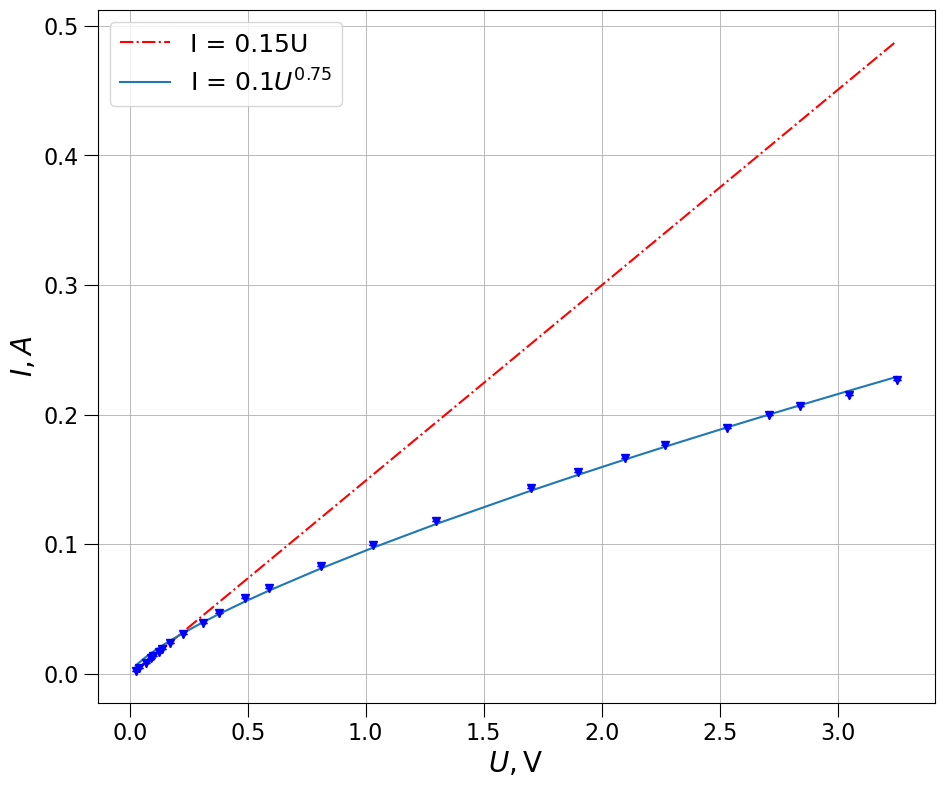

In [8]:
def func(U, A, B):
    return A*U**B

U_filament = np.array([0.025, 0.04, 0.067, 0.092, 0.1,  0.124, 0.139, 0.171, 0.225, 0.31, 0.38, 0.49, 0.59, 0.81, 1.03, 1.3,   1.7, 1.9,   2.1,   2.27,  2.53, 2.71,  2.84,  3.05, 3.25])
I_filament = np.array([1.9,   4.1, 8.2,    12.1,  13.3, 16.7,  18.9,  23.3,  30.7,  39.3, 46.5, 58.4, 65.9, 83.1, 99.3, 117.7, 143, 155.5, 166.5, 176.3, 190,  199.8, 206.5, 215.1, 227]) * 10**(-3)


plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
plt.xlabel('$U, \\text{V}$', fontsize=20, rotation=0)

plt.ylabel('$I, A $', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.errorbar(
    U_filament, I_filament,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0,
    xerr=0,
    color='blue',
    capsize=3
)

# Aproximation of our data on linear part

z = np.polyfit(U_filament[0:6], I_filament[0:6], deg=1)
print ("MNK for linaer part: ", mnk(U_filament[0:6], I_filament[0:6]))

polynom_1 = np.poly1d(z)
plt.plot(U_filament, polynom_1(U_filament),"k-.", color="red", label = 'I = ' + str(round(z[0], 2)) + 'U')

# Approximation of pur data fully
popt, pcov = curve_fit(func, U_filament, I_filament, maxfev=10**6)
A, B = popt
print('A={0}\nB={1}\n'.format(*tuple(popt)))
plt.plot(U_filament, func(U_filament, *popt), label= "I = " + str(round(A, 1)) + "$U^{" + str(round(B, 2)) + "}$")

plt.legend(fontsize=18, markerscale = 2)
plot_1.savefig('pics/diff_resist.png')


<>:12: SyntaxWarning: invalid escape sequence '\O'
<>:12: SyntaxWarning: invalid escape sequence '\O'
/tmp/ipykernel_19151/2080227557.py:12: SyntaxWarning: invalid escape sequence '\O'
  plt.ylabel('$R, \Omega$', fontsize=20)


A=10.415999931429143
B=0.2630568751454252



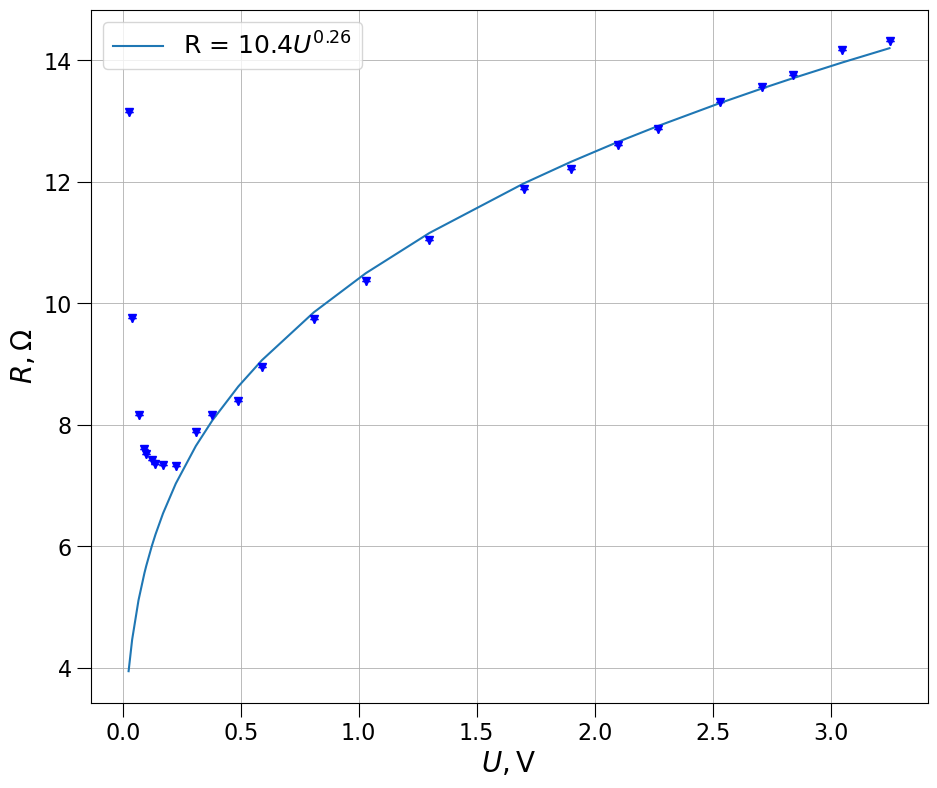

In [9]:
def func(U, A, B):
    return A*U**B

U_filament = np.array([0.025, 0.04, 0.067, 0.092, 0.1,  0.124, 0.139, 0.171, 0.225, 0.31, 0.38, 0.49, 0.59, 0.81, 1.03, 1.3,   1.7, 1.9,   2.1,   2.27,  2.53, 2.71,  2.84,  3.05, 3.25])
I_filament = np.array([1.9,   4.1, 8.2,    12.1,  13.3, 16.7,  18.9,  23.3,  30.7,  39.3, 46.5, 58.4, 65.9, 83.1, 99.3, 117.7, 143, 155.5, 166.5, 176.3, 190,  199.8, 206.5, 215.1, 227]) * 10**(-3)
R = U_filament / I_filament

plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
plt.xlabel('$U, \\text{V}$', fontsize=20, rotation=0)

plt.ylabel('$R, \Omega$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.errorbar(
    U_filament, R,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0,
    xerr=0,
    color='blue',
    capsize=3
)

# Aproximation of our data on linear part

# z = np.polyfit(U_filament[0:6], I_filament[0:6], deg=1)
# print ("MNK for linaer part: ", mnk(U_filament[0:6], I_filament[0:6]))
#
# polynom_1 = np.poly1d(z)
# plt.plot(U_filament, polynom_1(U_filament),"k-.", color="red", label = 'I = ' + str(round(z[0], 2)) + 'U')

# Approximation of pur data fully
popt, pcov = curve_fit(func, U_filament[8:], R[8:], maxfev=10**6)
A, B = popt
print('A={0}\nB={1}\n'.format(*tuple(popt)))
plt.plot(U_filament, func(U_filament, *popt), label= "R = " + str(round(A, 1)) + "$U^{" + str(round(B, 2)) + "}$")

# print(func(2, *popt))

plt.legend(fontsize=18, markerscale = 2)
plot_1.savefig('pics/resist.png')


$$ R = R_0 (1 + \alpha * (T - T_0)$$

$$R  = \frac{dU}{dI} = \frac{1}{\frac{dI}{dU}}$$

$$\frac{dU}{dI} = \frac{U^{\frac{1}{4}}}{0.075}$$


$$T = \frac{\frac{\frac{dU}{dI}}{R_0} - 1}{ \alpha} + T_0$$

In [10]:
R_0 = 1 / (0.15)
T_0 = 300
a   = 5 * 10**(-3)
print(R_0)


U = np.array([2.0, 2.05, 2.12, 2.16, 2.22, 2.26])


diff = U**(1/4) / 0.075
T = (func(U, *popt) / R_0 - 1) / a  + T_0
print(T)
#
#
# diff = U**(1/4) / 0.075
# T = (diff / R_0 - 1) / a  + 300
# print(T)


6.666666666666667
[474.98183766 477.42548308 480.77384978 482.65076133 485.41867517
 487.23346522]


In [11]:
dict_U_I = {
  'U_filament' : np.array([2.0, 2.05, 2.12, 2.16, 2.22, 2.26]),
  'I_sut_cur'  : np.array([5,   6.25, 8.5,  9.0,  10.7, 13.7]) * 10**(-6)
}

MNK for linaer part:  [np.float64(-16874.749930200353), np.float64(952.433731742246), np.float64(11.014161682531533), np.float64(0.01755099641727695)]
0.9812447252553413


/tmp/ipykernel_19151/1636277709.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-." (-> color='k'). The keyword argument will take precedence.
  plt.plot(x, polynom_1(x),"k-.", color="red", label = 'y = ' + str(round(z[0], 0)) + 'x')


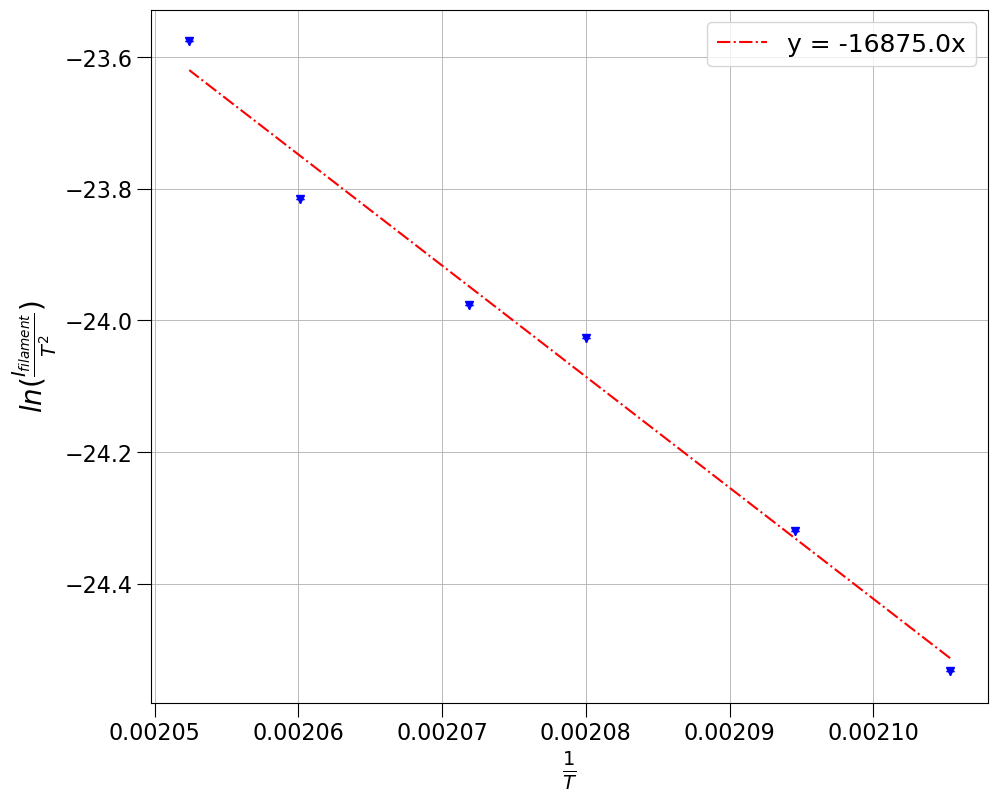

In [12]:

y = np.log(dict_U_I['I_sut_cur'] / T**2)
x = 1/T

plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
plt.grid(visible=True, linewidth=0.6)
plt.xlabel('$\\frac{1}{T}$', fontsize=20, rotation=0)

plt.ylabel('$ln(\\frac{I_{filament}}{T^2})$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=16, size=10)
plt.grid(visible=True, linewidth=0.6)

plt.errorbar(
    x, y,
    fmt='v',
    linewidth=1,
    markersize=6,
    elinewidth=1,
    yerr=0,
    xerr=0,
    color='blue',
    capsize=3
)

# Aproximation of our data on linear part

z = np.polyfit(x, y, deg=1)
print ("MNK for linaer part: ", mnk(x, y))

slope, intercept, r_value, p_value, std_err = linregress(x, y)
print( r_value**2)

polynom_1 = np.poly1d(z)
plt.plot(x, polynom_1(x),"k-.", color="red", label = 'y = ' + str(round(z[0], 0)) + 'x')

plt.legend(fontsize=18, markerscale = 2)
plot_1.savefig('pics/richardson.png')


## Референсное значение T по пирометру для новой лампы ##

In [13]:
# U_filament = np.array([3.08, 3.25, 3.51])
# I_filament = np.array([219, 227.3, 240.5]) * 10**(-3)
# T          = np.array([np.mean(835, 808, 805),
#                        np.mean(833, 807, 822),
#                        np.mean(863, 835, 857)])
#
#
# plot_1 = plt.figure(figsize=(12*0.9,10*0.9))
# plt.grid(visible=True, linewidth=0.6)
# plt.xlabel('$U, \\text{V}$', fontsize=20, rotation=0)
#
# plt.ylabel('$I, mA $', fontsize=20)
# plt.tick_params(axis='both', which='major', labelsize=16, size=10)
# plt.grid(visible=True, linewidth=0.6)
#
# plt.errorbar(
#     U_filament, T,
#     fmt='v',
#     linewidth=1,
#     markersize=6,
#     elinewidth=1,
#     yerr=0,
#     xerr=0,
#     color='blue',
#     capsize=3
# )
#
# z = np.polyfit(U_filament, T, deg=7)
# polynom_1 = np.poly1d(z)
#
# plt.legend(fontsize=18, markerscale = 2)
#
# plot_1.savefig('pics/temperature.png')
